# [0] Addition of Images

In [139]:
import cv2 #[1]
import matplotlib.pyplot as plt  
import numpy as np

## [2] Single Channel Images

### [3] Simple Addition

[4] Let us first try adding the following single channel images together:

<img src="Images/bwdiagonal.jpg" width=300>

<img src="Images/white.jpg" width=300>


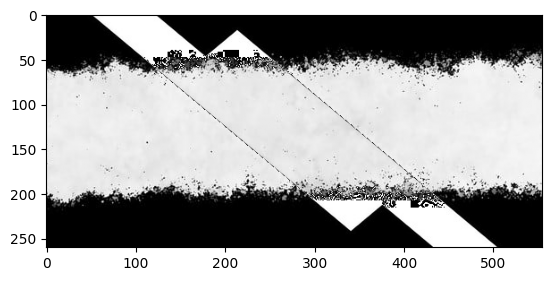

In [140]:
img1 = cv2.imread("Images/bwdiagonal.jpg")  #[5]
img2 = cv2.imread("Images/white.jpg")

mat1 = np.asmatrix(img1[:,:,0])
mat2 = np.asmatrix(img2[:,:,0])

mat3 = mat1+mat2

plt.imshow(mat3[:,:],cmap='gray')

[6] The above code did simple matrix addition. Some elements in the the final sum may exceed 255 which is the maximum value for intensity for an image. OpenCV deals with this by classifying all values greater than 255 as maximum intensity. 

For example, if elements add up to 321, the pixel with have same intensity as 255. 

In short, all pixels with values greater than 255 are pure white. This may lead to loss in detail in the resultant image

To tackle this problem, we shall use the concept of normalization.
 
 N = (I - min(I))/(max(I)-min(I))*255

 Where N is the normalized image matrix, I is the input image matrix

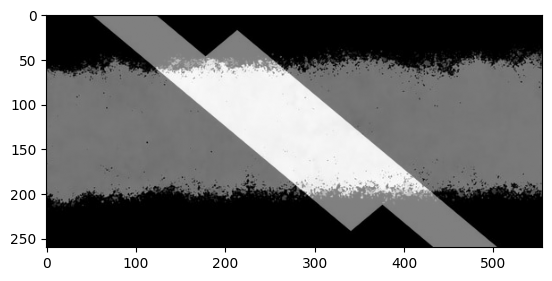

In [141]:
mat1 = np.asmatrix(img1[:,:,0]) #[7]
mat1 = (1/255)*mat1

mat2 = np.asmatrix(img2[:,:,0])
mat2 = (1/255)*mat2

mat3 = mat1+mat2
mat3 = 255*mat3

plt.imshow(mat3,cmap='gray')

In [142]:
print(mat3.max())

510.0


Let us define a function to add images:

In [143]:
def PicSum(x,y): #[8]
    matx = np.asmatrix(x[:,:,0])
    matx = (1/255)*matx
    maty = np.asmatrix(y[:,:,0])
    maty = (1/255)*maty

    matxy = matx + maty
    matxy = 255*matxy

    return(plt.imshow(matxy,cmap='gray'))

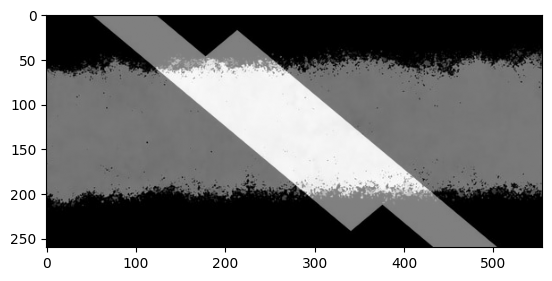

In [144]:
PicSum(img1,img2) #[9]

### [10] Weighted Addition

[11] We shall use the following formula to do weighted addition of images:

I = α × A + (1 − α) × B

Where I is the final image matrix, and A, B are the input image matrices. α is the parameter which will control weight of an image.

In [145]:
def W_add(p,q,k): #[12]
    return( k*p + (1-k)*q)

def W_PicSum(x,y,t=0.5):
    matx = np.asmatrix(x[:,:,0])
    matx = (1/255)*matx
    maty = np.asmatrix(y[:,:,0])
    maty = (1/255)*maty

    matxy = W_add(matx, maty, t)
    matxy = 255*matxy

    return(plt.imshow(matxy,cmap='gray'))

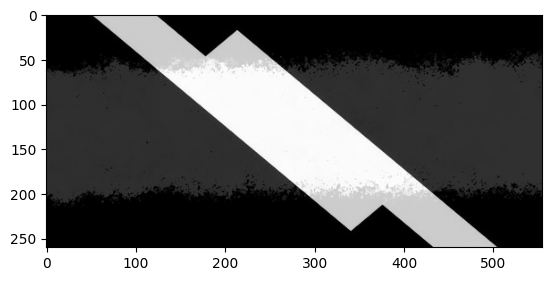

In [146]:
W_PicSum(img1,img2,0.8) #[13]

## [14] Multi Channel Images

[15] Let us try to add the following images:

<img src="Images/city.jpg" width='300'>
<img src="Images/space.jpg" width='300'>

In [147]:
img_city = cv2.imread("Images/city.jpg",-1) #[16]

img_space = cv2.imread("Images/space.jpg",-1)

In [148]:
mat_city_B = np.asmatrix(img_city[:,:,0]) #[17]
mat_city_G = np.asmatrix(img_city[:,:,1])
mat_city_R = np.asmatrix(img_city[:,:,2])

mat_space_B = np.asmatrix(img_space[:,:,0])
mat_space_G = np.asmatrix(img_space[:,:,1])
mat_space_R = np.asmatrix(img_space[:,:,2])

mat_sum_B = mat_city_B + mat_space_B
mat_sum_G = mat_city_G + mat_space_G
mat_sum_R = mat_city_R + mat_space_R

mat_sum = cv2.merge([mat_sum_B, mat_sum_G, mat_sum_R])

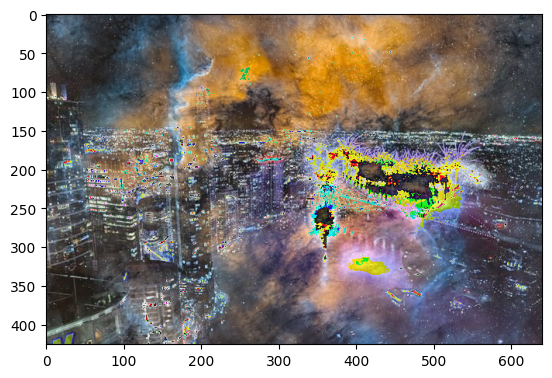

In [149]:
plt.imshow(mat_sum) #[18]

The output looks bad because we did not scale pixel values so that the sum is bounded above by 255. We will do that next.

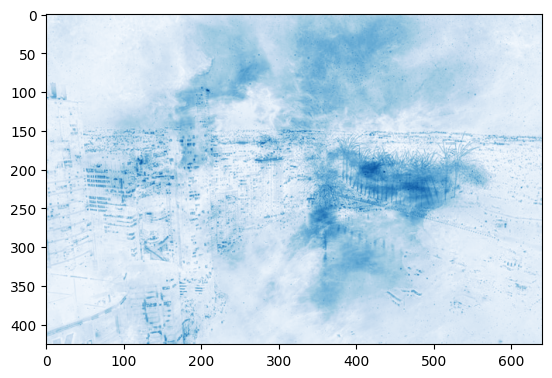

In [150]:
mat1B = np.asmatrix(img_city[:,:,0])
mat1B = (1/255)*mat1B

mat2B = np.asmatrix(img_space[:,:,0])
mat2B = (1/255)*mat2B

mat3B = mat1B+mat2B
mat3B = 255*mat3B

mat3B = ((mat3B - mat3B.min())/(mat3B.max() - mat3B.min()))*255

plt.imshow(mat3B,cmap='Blues')

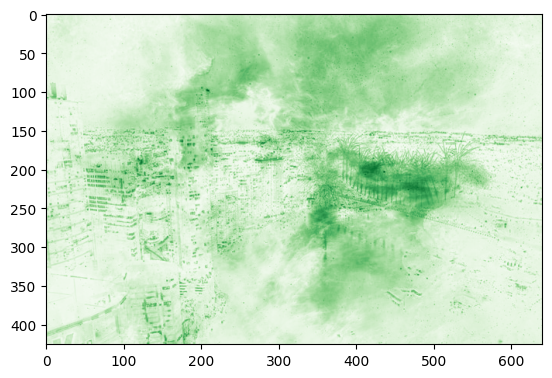

In [151]:
mat1G = np.asmatrix(img_city[:,:,0])
mat1G = (1/255)*mat1G

mat2G = np.asmatrix(img_space[:,:,0])
mat2G = (1/255)*mat2G

mat3G = mat1G+mat2G
mat3G = 255*mat3G

mat3G = ((mat3G - mat3G.min())/(mat3G.max() - mat3G.min()))*255

plt.imshow(mat3G,cmap='Greens')

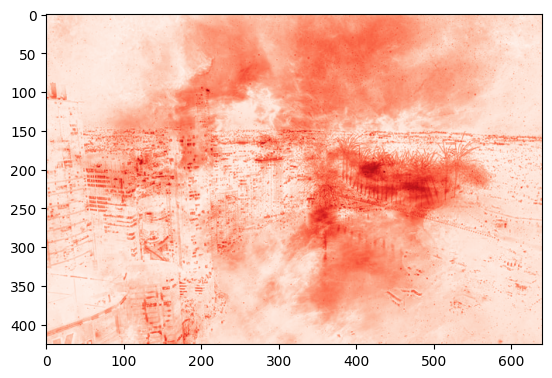

In [152]:
mat1R = np.asmatrix(img_city[:,:,0])
mat1R = (1/255)*mat1R

mat2R = np.asmatrix(img_space[:,:,0])
mat2R = (1/255)*mat2R

mat3R = mat1R+mat2R
mat3R = 255*mat3R

mat3R = ((mat3R - mat3R.min())/(mat3R.max() - mat3R.min()))*255

plt.imshow(mat3R,cmap='Reds')

In [153]:
print(mat3B.shape, mat3G.shape, mat3R.shape)

print(mat3B.max(), mat3G.max(), mat3R.max())

(426, 640) (426, 640) (426, 640)
255.0 255.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


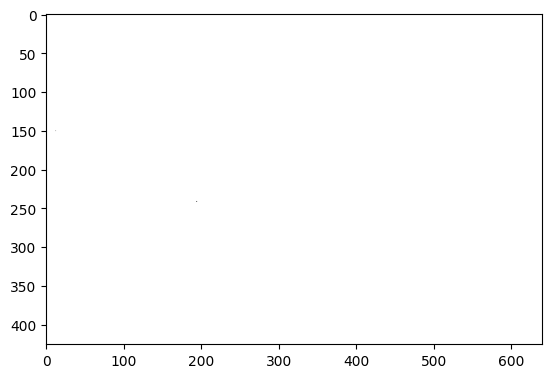

In [154]:
mat_sum1 = cv2.merge([mat3B,mat3G,mat3R])

plt.imshow(mat_sum1)